In [3]:
from graphviz import Graph as Ggraph

In [4]:
class Graph():
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]
        self.mst = []
        
    def make_graph(self):
        dot = Ggraph(format='svg', graph_attr={'rankdir': 'LR'}, )
        for i in range(self.V):
            dot.node(str(i), str(i))
        for i in range(self.V):
            for j in range(i + 1, self.V): 
                if self.graph[i][j] != 0:
                    dot.edge(str(i), str(j), label=str(self.graph[i][j])+"      ")
        return dot

    def make_mst(self):
        dot = Ggraph(format='svg',graph_attr={'rankdir':'LR'})
        for node in self.mst:
            dot.node(str(node[0]),str(node[0]))
        for s in self.mst:
            dot.edge(str(s[0]),str(s[1]),label=str(s[2]))
        return dot

    def minKey(self, key, mstSet):
        min = float('inf')
        for v in range(self.V):
            if key[v] < min and mstSet[v] == False:
                min = key[v]
                min_index = v
        return min_index
    
    def primMST(self):
        key = [float('inf')] * self.V
        parent = [None] * self.V
        key[0] = 0
        mstset = [False] * self.V
        parent[0] = -1
        for _ in range(self.V):
            u = self.minKey(key,mstset)
            mstset[u] = True
            for v in range(self.V):
                if self.graph[u][v] > 0 and mstset[v] == False and key[v] > self.graph[u][v]:
                    key[v] = self.graph[u][v]
                    parent[v] = u
        print("Edge \tWeight")
        for i in range(1, self.V):
            print(parent[i], "-", i, "\t", self.graph[i][parent[i]])
            self.mst.append([parent[i],i,self.graph[i][parent[i]]])

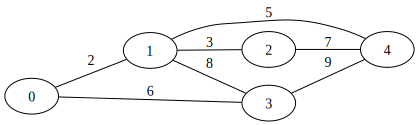

In [5]:
g = Graph(5)
g.graph = [[0, 2, 0, 6, 0],
           [2, 0, 3, 8, 5],
           [0, 3, 0, 0, 7],
           [6, 8, 0, 0, 9],
           [0, 5, 7, 9, 0]]
g.make_graph()

Edge 	Weight
0 - 1 	 2
1 - 2 	 3
0 - 3 	 6
1 - 4 	 5


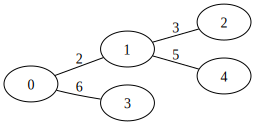

In [6]:
g.primMST()
g.make_mst()